# Tonality analysis: chords estimation

Essentia provides two basic algorithms for chord estimation given a harmonic representation of input audio in a form of an *HPCPgram* (HPCP chromagram; see the [HPCP tutorial](tutorial_tonal_hpcpkeyscale.html) for how to compute it):

- [ChordsDetection](https://essentia.upf.edu/documentation/reference/std_ChordsDetection.html) is a naive algorithm estimating chords in a sliding window over an input HPCP chromagram.
- [ChordsDetectionBeats](https://essentia.upf.edu/documentation/reference/std_ChordsDetectionBeats.html) is a similar algorithm, but it estimates chords on segments between consecutive beats given their time positions as an additional input.

In addition, [ChordsDescriptors](https://essentia.upf.edu/documentation/reference/std_ChordsDescriptors.html) describes the estimated chord progression by means of key, scale, histogram, and rate of change.

The analysis pipeline to compute HPCPs in this example is identical to the one used the HPCP tutorial to compute a 12-bin HPCPgram:

In [2]:
import essentia.streaming as ess
import essentia

audio_file = '../../../test/audio/recorded/mozart_c_major_30sec.wav'

# Initialize algorithms we will use.
loader = ess.MonoLoader(filename=audio_file)
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500, 
                                  maxPeaks=60)

# Use default HPCP parameters for plots.
# However we will need higher resolution and custom parameters for better Key estimation.

hpcp = ess.HPCP()

# Use pool to store data.
pool = essentia.Pool() 

# Connect streaming algorithms.
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
hpcp.hpcp >> (pool, 'tonal.hpcp')

# Run streaming network.
essentia.run(loader)

Let's plot the resulting HPCP:

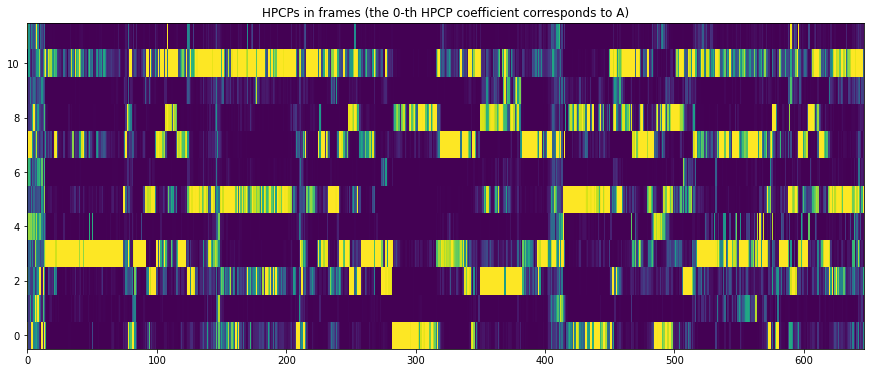

In [3]:
# Plots configuration.
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6)

# Plot HPCP.
imshow(pool['tonal.hpcp'].T, aspect='auto', origin='lower', interpolation='none')
plt.title("HPCPs in frames (the 0-th HPCP coefficient corresponds to A)")
show()

Now we can run a naive estimation of chords with 2-second sliding window over the computed HPCPgram:

In [7]:
from essentia.standard import ChordsDetection

# Using a 2 seconds window over HPCP matrix to estimate chords
chords, strength = ChordsDetection(hopSize=2048, windowSize=2)(pool['tonal.hpcp'])
print(chords)

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',

The estimated chord sequence can be further post-processed.

TODO ChordsDescriptors